In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [85]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\nizamabad_aqi.csv") # Reading the data

In [86]:
df

,date,pm10,SO2,NOx,rainfall
0,1/1/2016,67.0,5.0,18.0,NaN
1,1/2/2016,64.0,5.0,19.0,NaN
2,1/3/2016,66.0,5.0,17.0,NaN
3,1/4/2016,68.0,5.0,18.0,NaN
4,1/5/2016,71.0,4.0,16.0,NaN
...,...,...,...,...,...
79,1/8/2022,52.0,6.7,23.3,130.7
80,1/9/2022,51.0,7.9,25.0,242.3
81,1/10/2022,61.0,8.6,27.4,NaN
82,1/11/2022,56.0,6.8,25.0,NaN


In [87]:
df['date']=pd.to_datetime(df.date, format='%d/%m/%Y') # converting column date to datetime object of pandas


In [88]:
df

,date,pm10,SO2,NOx,rainfall
0,2016-01-01,67.0,5.0,18.0,NaN
1,2016-02-01,64.0,5.0,19.0,NaN
2,2016-03-01,66.0,5.0,17.0,NaN
3,2016-04-01,68.0,5.0,18.0,NaN
4,2016-05-01,71.0,4.0,16.0,NaN
...,...,...,...,...,...
79,2022-08-01,52.0,6.7,23.3,130.7
80,2022-09-01,51.0,7.9,25.0,242.3
81,2022-10-01,61.0,8.6,27.4,NaN
82,2022-11-01,56.0,6.8,25.0,NaN


In [89]:
df= df.set_index('date') # Setting date as index for time series predictions

In [90]:
df["rainfall"]=df["rainfall"].fillna(0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      79 non-null     float64
 1   SO2       80 non-null     float64
 2   NOx       80 non-null     float64
 3   rainfall  84 non-null     float64
dtypes: float64(4)
memory usage: 3.3 KB


In [92]:
df1= pd.DataFrame(columns=['pm10', 'SO2', 'NOx'])

In [93]:
df1['pm10']=df['pm10'].interpolate(method='nearest')
df1['SO2']=df['SO2'].interpolate(method='nearest')
df1['NOx']=df['NOx'].interpolate(method='nearest')


In [83]:
df1['SO2']=df['SO2'].interpolate(method='polynomial', order=5)

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

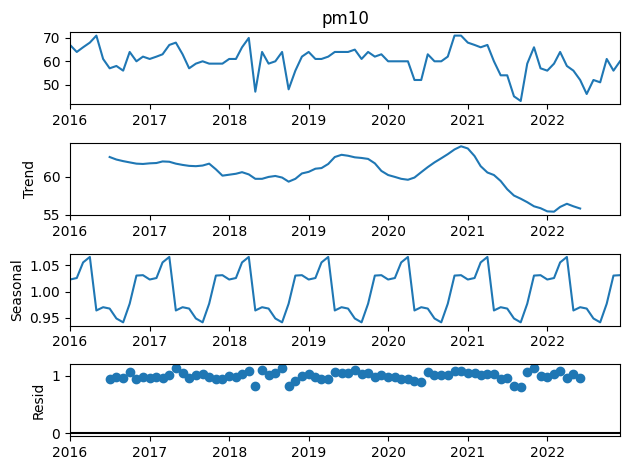

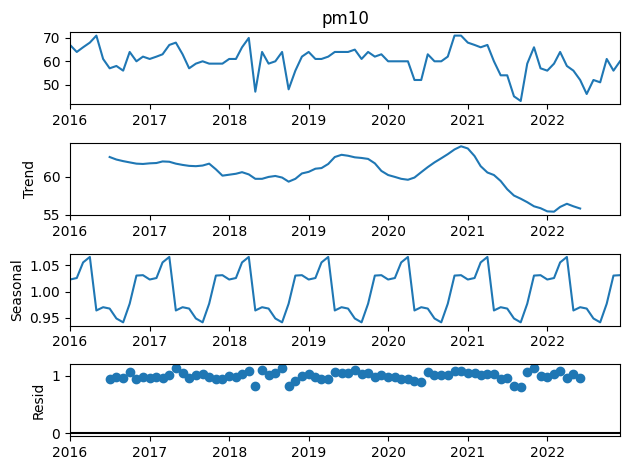

In [70]:
decompose_result = seasonal_decompose(df1['pm10'], period=12 ,model='mul')
decompose_result.plot() # plotting seasonal decompostion for finding seasonality and trend

#### During covid lockdown PM10 dropped by almost 45%, so this will create outlier in our data. So we will clean our data
#### PM10 during April and May 2020 were affected, as june, july are rainy season so PM10 conc in air decreases

In [94]:
train=df1['SO2'][:72]
test=df1['SO2'][72:]

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [103]:
# Running Holt-Winters triple exponential smoothing on our data
nizamabad_so2 = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction= nizamabad_so2.forecast(len(test))

for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print("RMSE: ",rmse)
mape1= mape(test, prediction)
print("MAPE: %.2f" %(mape1*100),"%")

Prediction:6.0064793869620745   Expected:6.9
Prediction:5.9540191921211045   Expected:7.5
Prediction:6.084964388434133   Expected:6.6
Prediction:6.032814474339834   Expected:7.8
Prediction:5.897516462391567   Expected:7.3
Prediction:5.912547842600292   Expected:6.0
Prediction:5.9444746947361695   Expected:5.5
Prediction:5.860087583390824   Expected:6.7
Prediction:5.875721649521694   Expected:7.9
Prediction:6.341498622768829   Expected:8.6
Prediction:6.590748113059398   Expected:6.8
Prediction:6.540229304346905   Expected:7.5
RMSE:  1.278597478165753
MAPE: 14.42 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
train1=df1["pm10"][:72] # Training data allocation 
test1=df1["pm10"][72:] # Testing data allocation

In [126]:
# # Training and testing Holt Winters Model on pm10 concentration data

nizamabad_pm10 = ExponentialSmoothing(
    train1,
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction1= nizamabad_pm10.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction1[i], test1[i]))
rmse= mse(test1, prediction1, squared=False)
print("RMSE: ",rmse)
mape1= mape(test1, prediction1)
print("MAPE: %.2f" %(mape1*100),"%")

Prediction:62.52993477053891   Expected:56.0
Prediction:61.64527730051251   Expected:59.0
Prediction:62.911738777080664   Expected:64.0
Prediction:65.0013549606387   Expected:58.0
Prediction:59.74556455897544   Expected:56.0
Prediction:59.148077443747056   Expected:52.0
Prediction:58.5423085409819   Expected:46.0
Prediction:57.430268554843025   Expected:52.0
Prediction:56.97675359961162   Expected:51.0
Prediction:59.0188257770252   Expected:61.0
Prediction:62.056228892299046   Expected:56.0
Prediction:62.08901742232557   Expected:60.0
RMSE:  6.0031307531944
MAPE: 9.78 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
train2=df1["NOx"][:72]
test2=df1["NOx"][72:]

In [128]:
# Training and testing Holt Winters Model on NOx concentration data

nizamabad_nox = ExponentialSmoothing(
    train2,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction2= nizamabad_nox.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction2[i], test2[i]))
rmse= mse(test2, prediction2, squared=False)
print("RMSE: ",rmse)
mape1= mape(test2, prediction2)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:26.311912503410827   Expected:25.5
Prediction:26.10494612961348   Expected:27.5
Prediction:26.07394633065589   Expected:26.1
Prediction:25.786847336500497   Expected:24.0
Prediction:25.52344171769804   Expected:24.6
Prediction:25.244742932185652   Expected:23.4
Prediction:25.98274404885673   Expected:21.3
Prediction:24.563565953594452   Expected:23.3
Prediction:25.15702741345458   Expected:25.0
Prediction:26.955594115419338   Expected:27.4
Prediction:27.060534582299308   Expected:25.0
Prediction:27.210406468844564   Expected:22.6
RMSE:  2.2230458838753564
MAPE: 7.14 %


In [98]:
# running for prediction
nizamabad_so2_pred = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_SO2= nizamabad_so2_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [130]:
nizamabad_nox_pred = ExponentialSmoothing(
    df1['NOx'],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_NOx= nizamabad_nox_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [131]:
nizamabad_pm10 = ExponentialSmoothing(
    df1['pm10'],
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_PM10= nizamabad_pm10.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [132]:
pred= pd.DataFrame(data=pred_2023_SO2, columns=['SO2'])
pred['PM10']=pred_2023_PM10
pred['NOx']=pred_2023_NOx

In [133]:
pred

,SO2,PM10,NOx
2023-01-01,7.727489,58.124710,25.358961
2023-02-01,7.776882,57.832266,25.509321
2023-03-01,7.769478,59.673502,25.225083
2023-04-01,7.905160,60.649713,24.614532
2023-05-01,7.726902,55.903857,24.490633
2023-06-01,7.563438,54.865990,24.044183
2023-07-01,7.528852,53.536259,24.282158
2023-08-01,7.637283,53.486867,23.459390
2023-09-01,7.831607,53.004276,24.189550
2023-10-01,8.340571,56.231093,26.003611


In [134]:
## PM10 Sub-Index calculation
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

pred["PM10_SubIndex"] = pred["PM10"].apply(lambda x: PM10_subindex(x))

In [135]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["NOx_SubIndex"] = pred['NOx'].apply(lambda x: get_NOx_subindex(x))

In [136]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["SO2_SubIndex"] = pred["SO2"].apply(lambda x: get_SO2_subindex(x))

In [137]:
pred

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex
2023-01-01,7.727489,58.124710,25.358961,58.124710,31.698701,9.659361
2023-02-01,7.776882,57.832266,25.509321,57.832266,31.886652,9.721102
2023-03-01,7.769478,59.673502,25.225083,59.673502,31.531354,9.711847
2023-04-01,7.905160,60.649713,24.614532,60.649713,30.768165,9.881449
2023-05-01,7.726902,55.903857,24.490633,55.903857,30.613292,9.658627
2023-06-01,7.563438,54.865990,24.044183,54.865990,30.055229,9.454298
2023-07-01,7.528852,53.536259,24.282158,53.536259,30.352698,9.411064
2023-08-01,7.637283,53.486867,23.459390,53.486867,29.324238,9.546604
2023-09-01,7.831607,53.004276,24.189550,53.004276,30.236938,9.789509
2023-10-01,8.340571,56.231093,26.003611,56.231093,32.504514,10.425714


In [138]:
pred['AQI']=''

In [139]:
for i in range(len(pred)):
    pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25308\3451392264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])


In [140]:
pred # Final dataframe containing AQI data 

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex,AQI
2023-01-01,7.727489,58.124710,25.358961,58.124710,31.698701,9.659361,58.12471
2023-02-01,7.776882,57.832266,25.509321,57.832266,31.886652,9.721102,57.832266
2023-03-01,7.769478,59.673502,25.225083,59.673502,31.531354,9.711847,59.673502
2023-04-01,7.905160,60.649713,24.614532,60.649713,30.768165,9.881449,60.649713
2023-05-01,7.726902,55.903857,24.490633,55.903857,30.613292,9.658627,55.903857
2023-06-01,7.563438,54.865990,24.044183,54.865990,30.055229,9.454298,54.86599
2023-07-01,7.528852,53.536259,24.282158,53.536259,30.352698,9.411064,53.536259
2023-08-01,7.637283,53.486867,23.459390,53.486867,29.324238,9.546604,53.486867
2023-09-01,7.831607,53.004276,24.189550,53.004276,30.236938,9.789509,53.004276
2023-10-01,8.340571,56.231093,26.003611,56.231093,32.504514,10.425714,56.231093


In [141]:
pred.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\nizamabad_aqi_prediction.csv") # Writing to a csv file